In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [63]:
data = pd.read_excel('/content/menu_data-nov-to-des-2024.xlsx')

In [64]:
popular_menu = data.groupby('Menu').sum(numeric_only=True)['Jumlah_Pesanan'].sort_values(ascending=False)

In [65]:
data['Day'] = data['Tanggal'].dt.dayofyear
X = data[['Harga', 'Rating', 'Day']]
y = data['Jumlah_Pesanan']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [68]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 35.67456428571428


In [69]:
future_harga = data['Harga'].unique()[:7]
num_rows = len(future_harga)
future_days = pd.DataFrame({
    'Harga': future_harga,
    'Rating': [4.5] * num_rows,
    'Day': [365 + i for i in range(1, num_rows + 1)]
})

In [70]:
future_demand = model.predict(future_days)


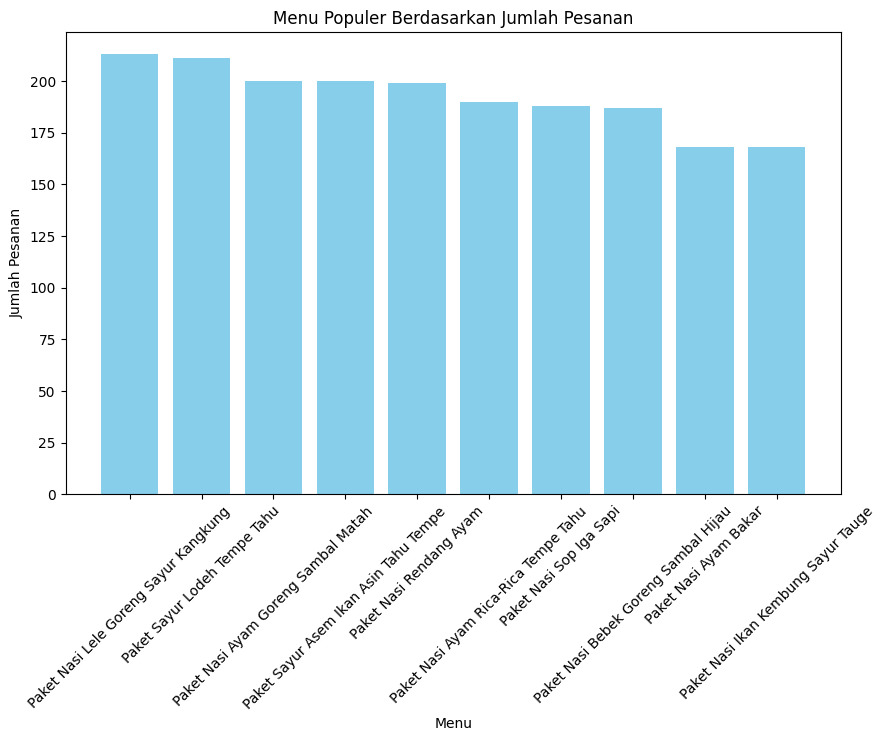

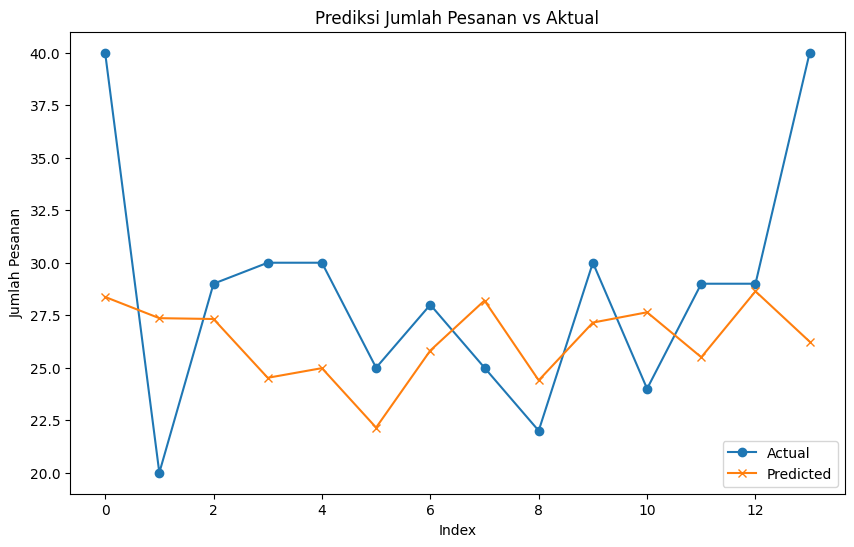

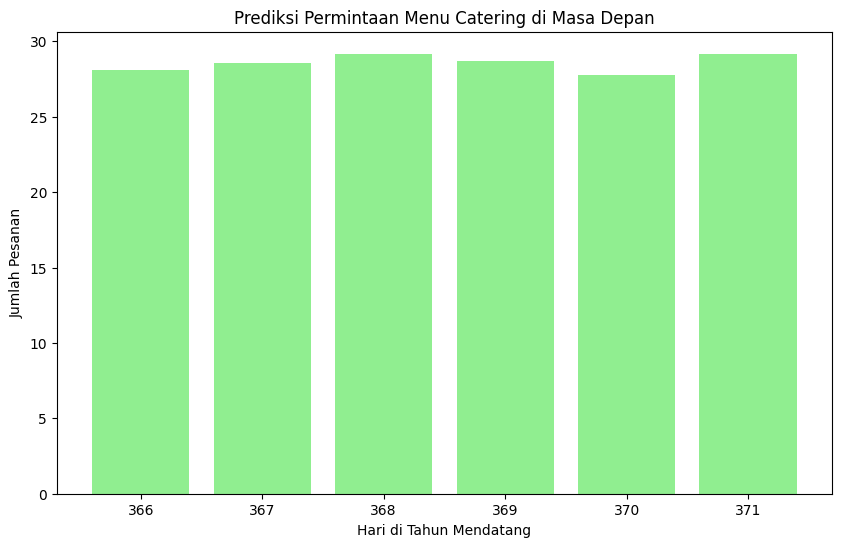

In [71]:
plt.figure(figsize=(10, 6))
plt.bar(popular_menu.index, popular_menu.values, color='skyblue')
plt.title('Menu Populer Berdasarkan Jumlah Pesanan')
plt.ylabel('Jumlah Pesanan')
plt.xlabel('Menu')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test.values, label='Actual', marker='o')
plt.plot(range(len(y_test)), y_pred, label='Predicted', marker='x')
plt.title('Prediksi Jumlah Pesanan vs Aktual')
plt.ylabel('Jumlah Pesanan')
plt.xlabel('Index')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(future_days['Day'], future_demand, color='lightgreen')
plt.title('Prediksi Permintaan Menu Catering di Masa Depan')
plt.ylabel('Jumlah Pesanan')
plt.xlabel('Hari di Tahun Mendatang')
plt.show()

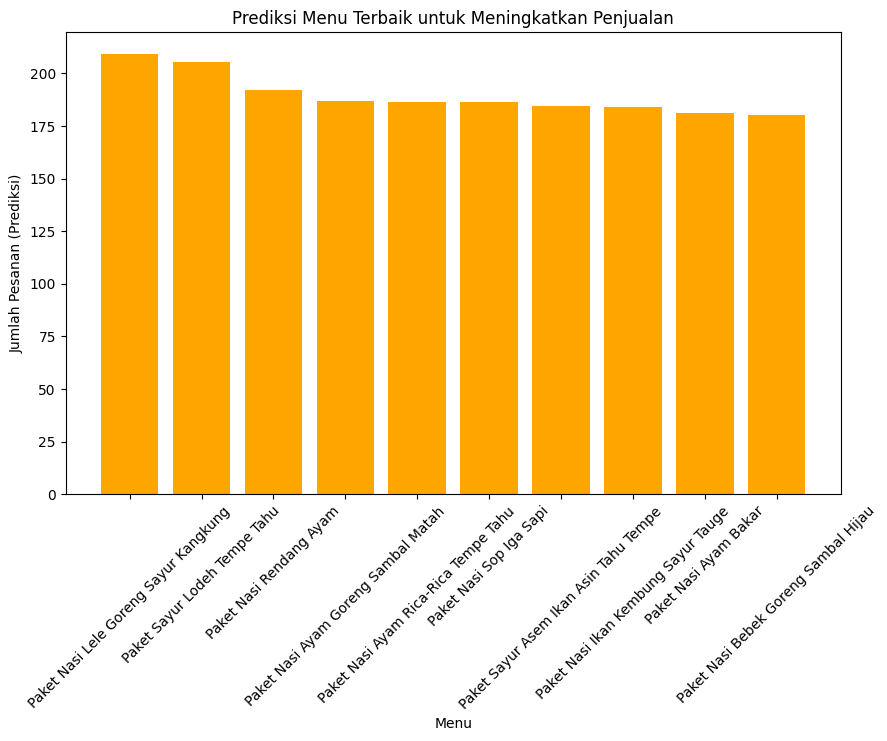

In [72]:
data['Predicted_Pesanan'] = model.predict(X)
menu_predictions = data.groupby('Menu').sum(numeric_only=True)['Predicted_Pesanan'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(menu_predictions.index, menu_predictions.values, color='orange')
plt.title('Prediksi Menu Terbaik untuk Meningkatkan Penjualan')
plt.ylabel('Jumlah Pesanan (Prediksi)')
plt.xlabel('Menu')
plt.xticks(rotation=45)
plt.show()